In [176]:
import random
import math


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


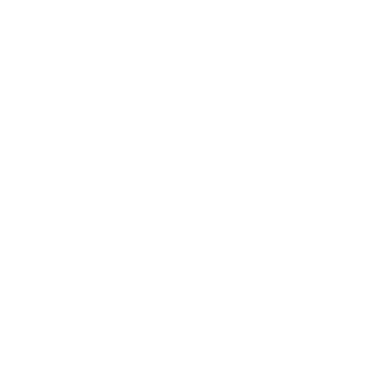

In [ ]:
# A regular grid of circles image
# User-defined parameters
image_width = 500         # Width of the image
image_height = 500        # Height of the image
circle_radius = 15        # Radius of the circles
spacing = 60              # Spacing between circle centers
circle_color = (0, 0, 0)  # Color of the filled circles (black in this case)

# Create a blank white image
image = Image.new("RGB", (image_width, image_height), "white")
draw = ImageDraw.Draw(image)

# Calculate the number of circles in both x and y directions
num_circles_x = image_width // spacing
num_circles_y = image_height // spacing

# Draw circles at regular intervals
for i in range(num_circles_x):
    for j in range(num_circles_y):
        # Calculate the center of each circle
        center_x = i * spacing + spacing // 2
        center_y = j * spacing + spacing // 2
        # print(center_x)

        # Draw the circle (outline)
        left_up = (center_x - circle_radius, center_y - circle_radius)
        right_down = (center_x + circle_radius, center_y + circle_radius)
        draw.ellipse([left_up, right_down], fill=circle_color)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [178]:
def white_balance(image) -> float:
	"""
	Calculatethe white/black balance of an image. 1=white. 0=black
	"""
	image_array = np.array(image)

	# Calculate the mean values for each channel (R, G, B)
	mean_rgb = np.mean(image_array, axis=(0, 1))

	# Assuming all grey, just take the max of any color channel
	max_mean = np.max(mean_rgb)

	return max_mean / 255


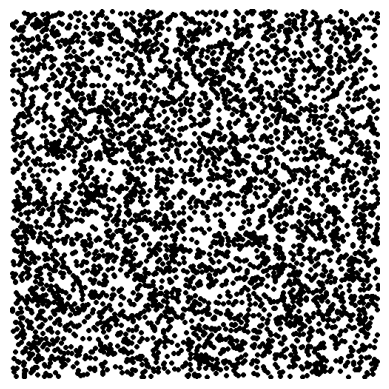

0.49884799999999996


In [179]:
#A A fully random image
# User-defined parameters
image_width = 500         # Width of the image
image_height = 500        # Height of the image
circle_radius = 3        # Radius of the circles
circle_color = 0		 # Color of the filled circles (out of 255)
desired_balance = 0.5       # how much white/black balance in the image

# Create a blank white image
image = Image.new("RGB", (image_width, image_height), (255, 255, 255, 0))
draw = ImageDraw.Draw(image)

i = 0
# how many times to generate more specles before checking
batches = 100
while(white_balance(image) > desired_balance):
	for r in range(batches):
		# Add a speckle
		center_x = random.randint(circle_radius, image_width - circle_radius)
		center_y = random.randint(circle_radius, image_height - circle_radius)

		# Draw the circle (outline)
		left_up = (center_x - circle_radius, center_y - circle_radius)
		right_down = (center_x + circle_radius, center_y + circle_radius)

		draw.ellipse([left_up, right_down], fill=(circle_color,circle_color,circle_color))
		i += 1
	# early exit in case loop spends forever
	if i > 20000:
		break

plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()
print(white_balance(image))


12


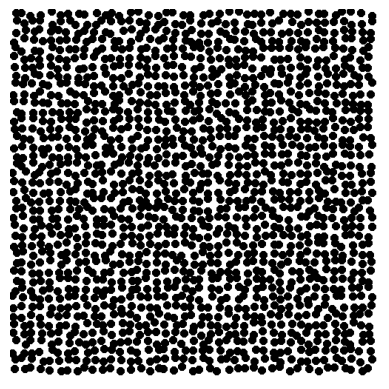

0.38973599999999997


In [180]:
# A spaced pattern of circles
# User-defined parameters
image_width = 500         # Width of the image
image_height = 500        # Height of the image
circle_radius = 5        # Radius of the circles
# spacing = 60              # Spacing between circle centers
circle_color = (0, 0, 0)  # Color of the filled circles (black in this case)
desired_balance = 0.5       # how much white/black balance in the image
variability = 0.5 # between 0-1. 0 = uniform 1= up to 1 box away

# Create a blank white image
image = Image.new("RGB", (image_width, image_height), "white")
draw = ImageDraw.Draw(image)

spacing = int(circle_radius * math.sqrt(math.pi / desired_balance))
print(spacing)

# Calculate the number of circles in both x and y directions
num_circles_x = image_width // spacing
num_circles_y = image_height // spacing

# Draw circles at regular intervals
for i in range(num_circles_x):
	for j in range(num_circles_y):
		# Calculate the center of each circle
		center_x = i * spacing + spacing // 2
		center_y = j * spacing + spacing // 2

		offset_x = random.randint(int(-spacing*variability/2), int(spacing*variability/2))
		offset_y = random.randint(int(-spacing*variability/2), int(spacing*variability/2))
		center_x += offset_x
		center_y += offset_y

		# Draw the circle (outline)
		left_up = (center_x - circle_radius, center_y - circle_radius)
		right_down = (center_x + circle_radius, center_y + circle_radius)
		draw.ellipse([left_up, right_down], fill=circle_color)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

print(white_balance(image))



In [181]:
def speckle(image_width=500, image_height=500, circle_radius=5, cicle_color = (0,0,0), desired_balance=0.5, variability=0.5):
	# A spaced pattern of circles
	# User-defined parameters
	# image_width = 500         # Width of the image
	# image_height = 500        # Height of the image
	# circle_radius = 5        # Radius of the circles
	# # spacing = 60              # Spacing between circle centers
	# circle_color = (0, 0, 0)  # Color of the filled circles (black in this case)
	# desired_balance = 0.5       # how much white/black balance in the image
	# variability = 0.5 # between 0-1. 0 = uniform 1= up to 2 boxes away

	# Create a blank white image
	image = Image.new("RGB", (image_width, image_height), "white")
	draw = ImageDraw.Draw(image)

	spacing = int(circle_radius * math.sqrt(math.pi / desired_balance))
	print(spacing)

	# Calculate the number of circles in both x and y directions
	num_circles_x = image_width // spacing
	num_circles_y = image_height // spacing

	# Draw circles at regular intervals
	for i in range(-1,num_circles_x+1):
		for j in range(-1,num_circles_y+1):
			# Calculate the center of each circle
			center_x = i * spacing + spacing // 2
			center_y = j * spacing + spacing // 2

			offset_x = random.randint(int(-spacing*variability/2), int(spacing*variability/2))
			offset_y = random.randint(int(-spacing*variability/2), int(spacing*variability/2))
			center_x += offset_x
			center_y += offset_y

			# Draw the circle (outline)
			left_up = (center_x - circle_radius, center_y - circle_radius)
			right_down = (center_x + circle_radius, center_y + circle_radius)
			draw.ellipse([left_up, right_down], fill=circle_color)

	# Display the image using matplotlib
	# plt.imshow(image)
	# plt.axis('off')  # Hide axes
	# plt.show()

	print(white_balance(image))
	return image


12
0.367908


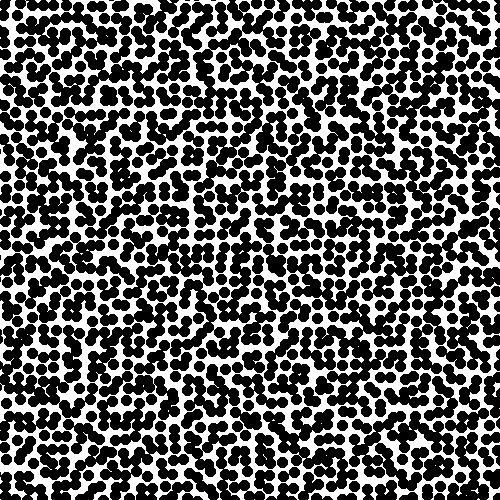

In [182]:
speckle()

In [199]:
import scipy.fft

# histogram of the white/black balance
def bw_hist(image):
	image_f = image.convert('L')  # Convert to grayscale ('L' mode)

	# Convert PIL image to a numpy array
	image_array = np.array(image_f)

	fft_image = scipy.fft.fft2(image_array)
	# Shift the zero-frequency component to the center
	fft_image_shifted = scipy.fft.fftshift(fft_image)

	# Compute the magnitude spectrum (log scale for better visibility)
	magnitude_spectrum = np.log(np.abs(fft_image_shifted) + 1)

	# Get the image dimensions
	M, N = image_array.shape

	# Create frequency axes (for plotting)
	freq_x = np.fft.fftfreq(N, 1)  # Horizontal frequency axis
	freq_y = np.fft.fftfreq(M, 1)  # Vertical frequency axis
	freq_x = np.fft.fftshift(freq_x)  # Shift the zero-frequency component to the center
	freq_y = np.fft.fftshift(freq_y)  # Same for vertical axis


	plt.figure(figsize=(6, 6))
	plt.imshow(magnitude_spectrum, cmap='gray', extent=(freq_x.min(), freq_x.max(), freq_y.min(), freq_y.max()))
	plt.title("Magnitude Spectrum of FFT of Speckles")
	plt.colorbar()
	plt.xlabel('Horizontal Frequency')
	plt.ylabel('Vertical Frequency')

	plt.show()

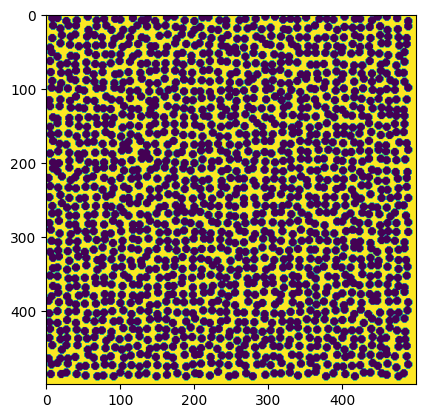

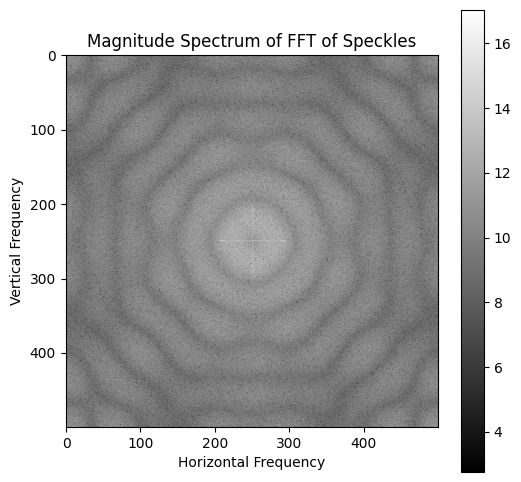

In [198]:
plt.imshow(image)
bw_hist(image)


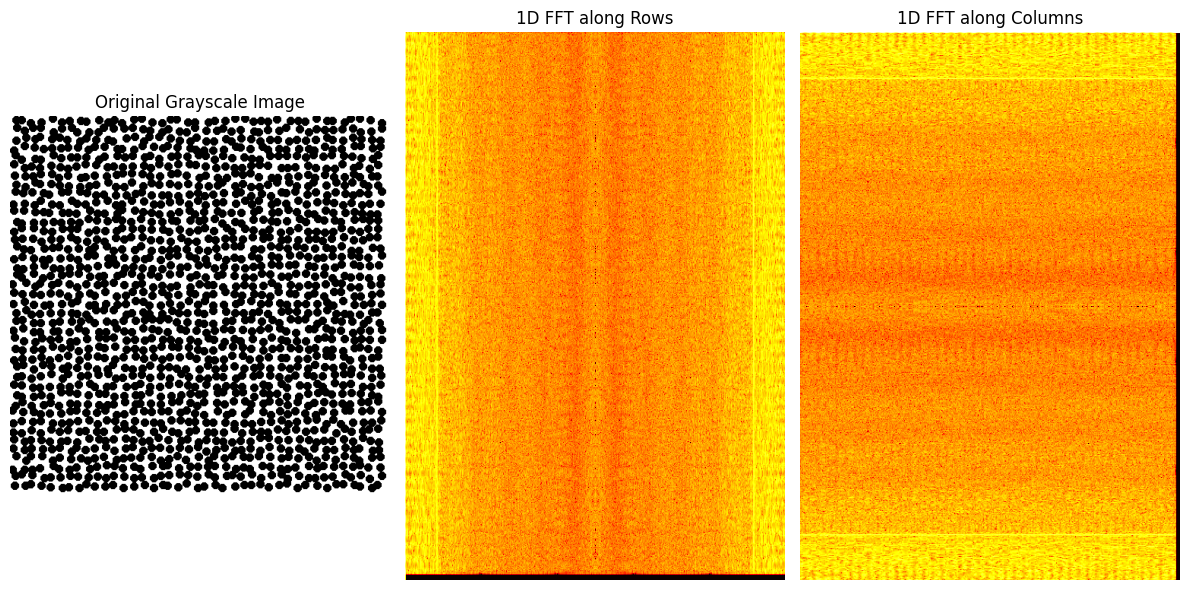

In [185]:
# 1D set of FFTs
# 1. Load a grayscale image
image_path = "your_image.png"  # Update with your image path
image = image.convert("L")  # Convert image to grayscale
image_array = np.array(image)

# 2. Compute 1D FFT along the rows (axis=1)
fft_rows = np.fft.fft(image_array, axis=1)

# 3. Compute 1D FFT along the columns (axis=0)
fft_columns = np.fft.fft(image_array, axis=0)

# 4. You can visualize the magnitude of the FFTs along rows and columns
# Row-wise FFT magnitude
fft_rows_magnitude = np.abs(fft_rows)

# Column-wise FFT magnitude
fft_columns_magnitude = np.abs(fft_columns)

# Visualize the original image and FFT magnitudes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(np.log(fft_rows_magnitude + 1), cmap='hot', aspect='auto')
plt.title("1D FFT along Rows")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(np.log(fft_columns_magnitude + 1), cmap='hot', aspect='auto')
plt.title("1D FFT along Columns")
plt.axis("off")

plt.tight_layout()
plt.show()


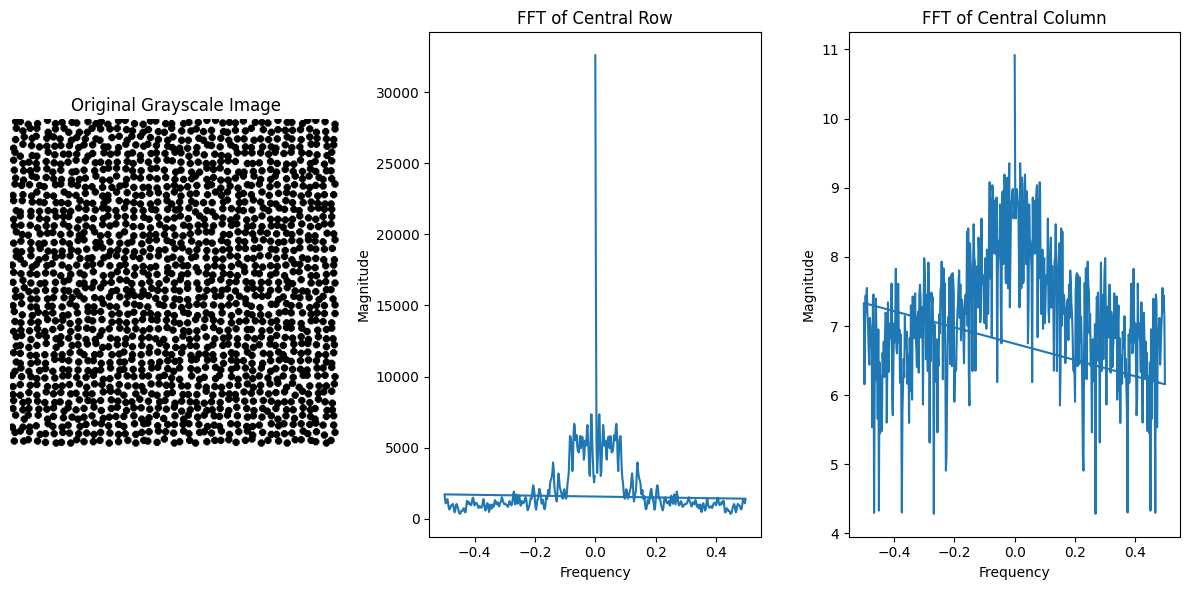

In [186]:
# Single FFT
# 1. Load a grayscale image
image = image.convert("L")  # Convert image to grayscale
image_array = np.array(image)

# 2. Extract the central row and central column
# Central row (if the image has an odd number of rows)
central_row = image_array[image_array.shape[0] // 2, :]

# Central column (if the image has an odd number of columns)
central_column = image_array[:, image_array.shape[1] // 2]

# 3. Compute the 1D FFT for both the central row and the central column
fft_central_row = np.fft.fft(central_row)
fft_central_column = np.fft.fft(central_column)

# 4. Compute the magnitude of the FFT
fft_central_row_magnitude = np.abs(fft_central_row)
fft_central_column_magnitude = np.abs(fft_central_column)
fft_central_row_log_magnitude = np.log(fft_central_row_magnitude + 1)
fft_central_column_log_magnitude = np.log(fft_central_column_magnitude + 1)

# Find peaks in the frequency spectrum: Look for the most prominent frequency components
# Use a Gaussian filter to smooth the spectrum and highlight significant peaks
smoothed_spectrum = scipy.ndimage.gaussian_filter(fft_central_row_magnitude, sigma=1)


# 5. Visualize the original image and the FFT results
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

# Plot the FFT of the central row
plt.subplot(1, 3, 2)
plt.plot(np.fft.fftfreq(central_row.size), smoothed_spectrum)
plt.title("FFT of Central Row")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

# Plot the FFT of the central column
plt.subplot(1, 3, 3)
plt.plot(np.fft.fftfreq(central_column.size), fft_central_column_log_magnitude)
plt.title("FFT of Central Column")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()


In [187]:
""" Calculate the pixel sizes """
image = image.convert("L")  # Convert image to grayscale
image_array = np.array(image)

# 2. Extract the central row and central column
# Central row (if the image has an odd number of rows)
central_row = image_array[image_array.shape[0] // 2, :]

peaks_info = scipy.signal.find_peaks(smoothed_spectrum, height=5000)
print(peaks_info)

freques = np.fft.fftfreq(central_column.size)

peaks = peaks_info[0]
# Should have a +freqency and a matching -frequency peak only in the signal
# assert len(peaks) % 2 == 2
# if multiple signals, they should all be multiples of a lowest common value - the true speckle size
peaks_freq = freques[peaks]
pix = 1/peaks_freq
pix


(array([  7,  13,  17,  22,  25,  31,  35,  42, 458, 465, 469, 475, 478,
       483, 487, 493]), {'peak_heights': array([7343.31948923, 6596.05363034, 5497.35492079, 5772.09667435,
       5824.91807346, 5877.10471195, 6678.0048217 , 5814.76749664,
       5814.76749664, 6678.0048217 , 5877.10471195, 5824.91807346,
       5772.09667435, 5497.35492079, 6596.05363034, 7343.31948923])})


array([ 71.42857143,  38.46153846,  29.41176471,  22.72727273,
        20.        ,  16.12903226,  14.28571429,  11.9047619 ,
       -11.9047619 , -14.28571429, -16.12903226, -20.        ,
       -22.72727273, -29.41176471, -38.46153846, -71.42857143])

In [188]:
1/freques[peaks]

array([ 71.42857143,  38.46153846,  29.41176471,  22.72727273,
        20.        ,  16.12903226,  14.28571429,  11.9047619 ,
       -11.9047619 , -14.28571429, -16.12903226, -20.        ,
       -22.72727273, -29.41176471, -38.46153846, -71.42857143])

-0.5


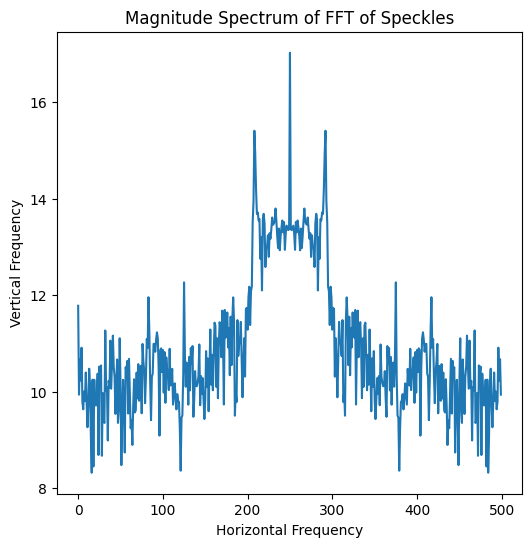

In [238]:
image_f = image.convert('L')  # Convert to grayscale ('L' mode)

# Convert PIL image to a numpy array
image_array = np.array(image_f)

fft_image = scipy.fft.fft2(image_array)
# Shift the zero-frequency component to the center
fft_image_shifted = scipy.fft.fftshift(fft_image)

# Compute the magnitude spectrum (log scale for better visibility)
magnitude_spectrum = np.log(np.abs(fft_image_shifted) + 1)

magnitude_spectrum[magnitude_spectrum.shape[0] // 2]

peaks_info = scipy.signal.find_peaks(magnitude_spectrum[magnitude_spectrum.shape[0] // 2], height=1)
heights = peaks_info[1]['peak_heights']
max_height = np.argmax(heights)
max_loc = peaks_info[0][np.argmax(heights)]

freques = np.fft.fftfreq(central_column.size)

mf = freques[max_loc]

print(mf)

# Get the image dimensions
M, N = image_array.shape

# # Create frequency axes (for plotting)
# freq_x = np.fft.fftfreq(N, 1)  # Horizontal frequency axis
# freq_y = np.fft.fftfreq(M, 1)  # Vertical frequency axis
# freq_x = np.fft.fftshift(freq_x)  # Shift the zero-frequency component to the center
# freq_y = np.fft.fftshift(freq_y)  # Same for vertical axis


plt.figure(figsize=(6, 6))
plt.plot(magnitude_spectrum[magnitude_spectrum.shape[0] // 2])
plt.title("Magnitude Spectrum of FFT of Speckles")
plt.xlabel('Horizontal Frequency')
plt.ylabel('Vertical Frequency')

plt.show()

In [ ]:
magnitude_spectrum.shape[0] // 2

250